# データを確認する

- csvデータをDataFrame化して、特徴を把握する
- 分析の方針を立てる
- データの加工方法を決定し、分析用のDataFrameを作成する

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## air_reserve.csv [Airリザーブの予約データ]

- 92,378レコード
- 314 /829店舗分の予約データ
- 訪問予定は、2016-01-01 19:00:00 〜 2017-05-31 21:00:00
- 予約時刻は、2016-01-01 01:00:00 〜 2017-04-22 23:00:00

In [14]:
# .csvをDataFrame化
df1 = pd.read_csv('Data/csv/air_reserve.csv')
df1.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [15]:
# データ型を確認
df1.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [16]:
# データ型を修正
df1['visit_datetime'] = df1.visit_datetime.map(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df1['reserve_datetime'] = df1.reserve_datetime.map(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df1.dtypes

air_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors             int64
dtype: object

In [17]:
# 統計量を確認
df1.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [18]:
# air_store_idのユニーク数
df1_id = df1.air_store_id.value_counts().count()
# visit_datetimeの最大・最小値
df1_min_vdate = df1.visit_datetime.min()
df1_max_vdate = df1.visit_datetime.max()
# reserve_datetimeの最大・最小値
df1_min_rdate = df1.reserve_datetime.min()
df1_max_rdate = df1.reserve_datetime.max()
print(df1_id,df1_min_vdate,df1_max_vdate,df1_min_rdate,df1_max_rdate)

314 2016-01-01 19:00:00 2017-05-31 21:00:00 2016-01-01 01:00:00 2017-04-22 23:00:00


In [19]:
# describeのoptionで上記も確認可能だった。https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
df1.describe(include='all')

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
count,92378,92378,92378,92378.000000
unique,314,4975,7513,NaN
top,air_8093d0b565e9dbdf,2016-12-24 19:00:00,2016-11-24 18:00:00,NaN
freq,2263,255,106,NaN
first,NaN,2016-01-01 19:00:00,2016-01-01 01:00:00,NaN
last,NaN,2017-05-31 21:00:00,2017-04-22 23:00:00,NaN
mean,NaN,NaN,NaN,4.481749
std,NaN,NaN,NaN,4.919669
min,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,2.000000


In [20]:
#  予約データを月次に加工
df1_monthly = df1.copy()
df1_monthly['visit_datetime'] = df1_monthly.visit_datetime.map(lambda x: x.strftime('%Y-%m'))
drop_col = ['air_store_id','reserve_datetime']
df1_monthly = df1_monthly.rename(columns={'visit_datetime': 'visit_month'}).drop(drop_col,axis=1)
df1_monthly = df1_monthly.groupby(['visit_month'])['reserve_visitors'].sum().reset_index()
df1_monthly

,visit_month,reserve_visitors
0,2016-01,10335
1,2016-02,11579
2,2016-03,17071
3,2016-04,13811
4,2016-05,8385
5,2016-06,4590
6,2016-07,4603
7,2016-08,2
8,2016-09,12
9,2016-10,7854


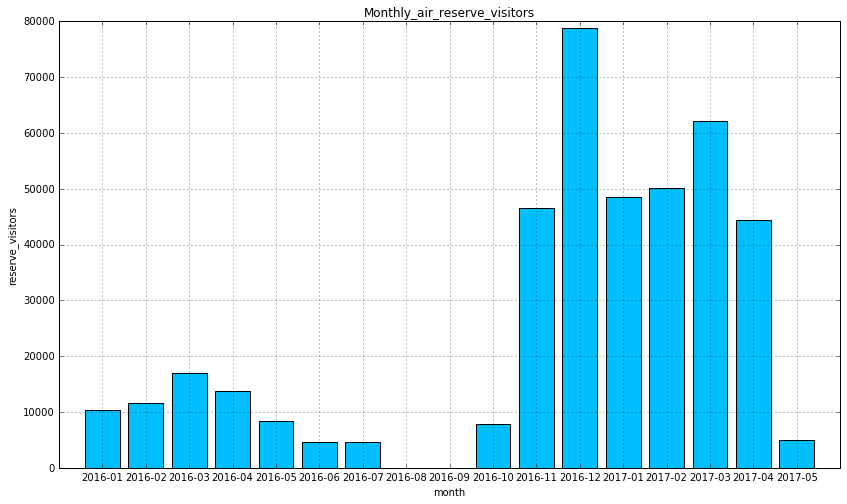

In [21]:
plt.figure(figsize=(14, 8))
plt.bar(np.arange(1,18), df1_monthly.reserve_visitors.as_matrix(), tick_label=df1_monthly.visit_month, align="center", color='deepskyblue')
plt.title("Monthly_air_reserve_visitors")
plt.xlabel("month")
plt.ylabel("reserve_visitors")
plt.grid(True)


## air_store_info.csv [Airリザーブのレストラン情報]

- 829店舗
- 14ジャンル
- 103エリア

In [95]:
# .csvをDataFrame化
df2 = pd.read_csv('Data/csv/air_store_info.csv')
df2.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [96]:
# データ型を確認
df2.dtypes

air_store_id       object
air_genre_name     object
air_area_name      object
latitude          float64
longitude         float64
dtype: object

In [97]:
# 統計量を確認
df2.describe(include='all')

,air_store_id,air_genre_name,air_area_name,latitude,longitude
count,829,829,829,829.000000,829.000000
unique,829,14,103,NaN,NaN
top,air_5ed3198e4a5eed0f,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō,NaN,NaN
freq,1,197,64,NaN,NaN
mean,NaN,NaN,NaN,35.647042,137.415311
std,NaN,NaN,NaN,2.084659,3.650971
min,NaN,NaN,NaN,33.211967,130.195555
25%,NaN,NaN,NaN,34.695124,135.341564
50%,NaN,NaN,NaN,35.658068,139.685474
75%,NaN,NaN,NaN,35.694003,139.751599


In [98]:
# 上記で確認できるため不要に
# df2_genre = df2.air_genre_name.value_counts().count()
# df2_area = df2.air_area_name.value_counts().count()
# print(df2_genre,df2_area)

In [99]:
# ジャンルの内訳と頻度
df2.groupby('air_genre_name').size().sort_values(ascending=False)

air_genre_name
Izakaya                         197
Cafe/Sweets                     181
Dining bar                      108
Italian/French                  102
Bar/Cocktail                     79
Japanese food                    63
Other                            27
Yakiniku/Korean food             23
Western food                     16
Okonomiyaki/Monja/Teppanyaki     14
Creative cuisine                 13
Karaoke/Party                     2
International cuisine             2
Asian                             2
dtype: int64

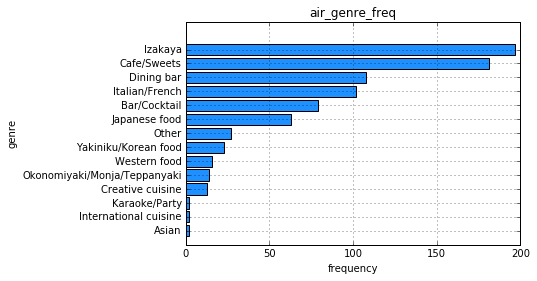

In [100]:
df2_air_genre_name = df2.groupby('air_genre_name').size().sort_values()
plt.barh(np.arange(1,15), df2_air_genre_name.values, tick_label=df2_air_genre_name.index, align="center", color='dodgerblue')
plt.title("air_genre_freq")
plt.xlabel("frequency")
plt.ylabel("genre")
plt.grid(True)

In [101]:
# エリアの内訳と頻度
df2.groupby('air_area_name').size().sort_values(ascending=False).head(15)

air_area_name
Fukuoka-ken Fukuoka-shi Daimyō                64
Tōkyō-to Shibuya-ku Shibuya                   58
Tōkyō-to Minato-ku Shibakōen                  51
Tōkyō-to Shinjuku-ku Kabukichō                39
Tōkyō-to Setagaya-ku Setagaya                 30
Tōkyō-to Chūō-ku Tsukiji                      29
Ōsaka-fu Ōsaka-shi Ōgimachi                   25
Hiroshima-ken Hiroshima-shi Kokutaijimachi    23
Tōkyō-to Meguro-ku Kamimeguro                 22
Tōkyō-to Suginami-ku Asagayaminami            21
Hokkaidō Sapporo-shi Minami 3 Jōnishi         21
Tōkyō-to Chiyoda-ku Kudanminami               20
Ōsaka-fu Ōsaka-shi Kyūtarōmachi               19
Hyōgo-ken Kōbe-shi Kumoidōri                  17
Miyagi-ken Sendai-shi Kamisugi                17
dtype: int64

In [102]:
# エリアを市区町村レベルに変更、plot時の文字化け対策で置換
df2_edit = df2.copy()
df2_edit['air_area_name'] = df2_edit.air_area_name.map(lambda x: ' '.join(x.split(' ')[:2]).translate(str.maketrans('Ōōū', 'Oou')))
df2_edit.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyogo-ken Kobe-shi,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyogo-ken Kobe-shi,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyogo-ken Kobe-shi,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyogo-ken Kobe-shi,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tokyo-to Minato-ku,35.658068,139.751599


In [103]:
df2_edit.air_area_name.describe()

count                         829
unique                         55
top       Fukuoka-ken Fukuoka-shi
freq                          103
Name: air_area_name, dtype: object

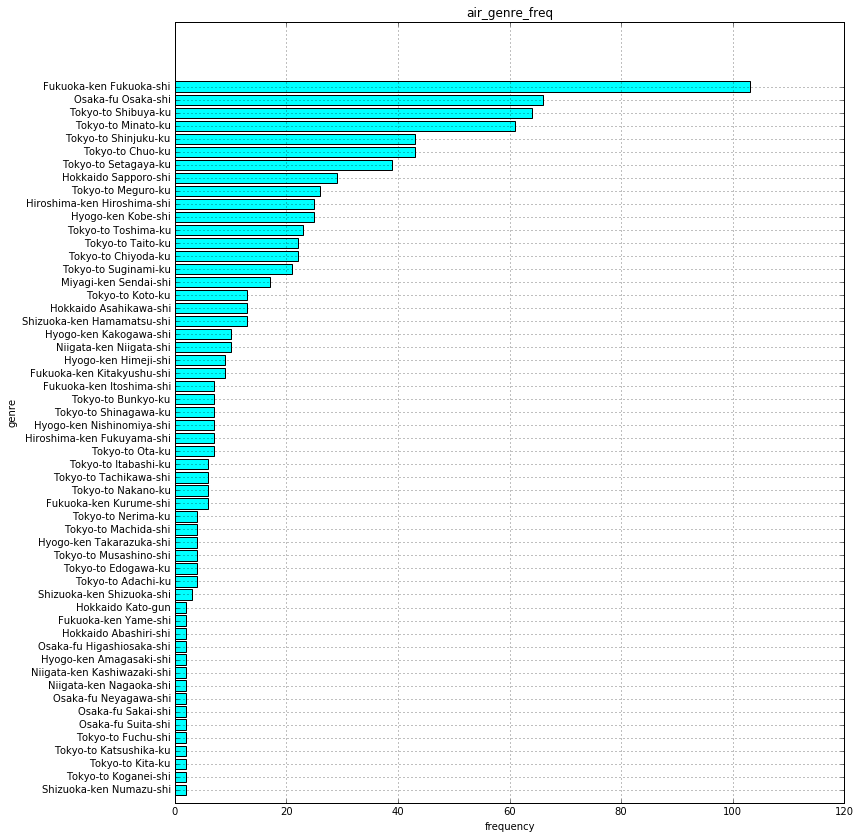

In [105]:
df2_air_area_name = df2_edit.groupby('air_area_name').size().sort_values()
plt.figure(figsize=(12, 14))
plt.barh(np.arange(1,56), df2_air_area_name.values, tick_label=df2_air_area_name.index, align="center", color='aqua')
plt.title("air_genre_freq")
plt.xlabel("frequency")
plt.ylabel("genre")
plt.grid(True)

## air_visit_data.csv [Airリザーブの訪問データ]

- 252,108レコード
- 829店舗全ての履歴データがある
- 訪問日時は、2016-01-01 〜 2017-04-22

In [7]:
# .csvをDataFrame化
df3 = pd.read_csv('Data/csv/air_visit_data.csv')
df3.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [8]:
# データ型を確認
df3.dtypes

air_store_id    object
visit_date      object
visitors         int64
dtype: object

In [9]:
# データ型を修正
df3['visit_date'] = df3.visit_date.map(lambda x: datetime.strptime(x,'%Y-%m-%d'))
df3.dtypes

air_store_id            object
visit_date      datetime64[ns]
visitors                 int64
dtype: object

In [10]:
# 統計量を確認
df3.describe(include='all')

,air_store_id,visit_date,visitors
count,252108,252108,252108.000000
unique,829,478,NaN
top,air_5c817ef28f236bdf,2017-03-17 00:00:00,NaN
freq,477,799,NaN
first,NaN,2016-01-01 00:00:00,NaN
last,NaN,2017-04-22 00:00:00,NaN
mean,NaN,NaN,20.973761
std,NaN,NaN,16.757007
min,NaN,NaN,1.000000
25%,NaN,NaN,9.000000


In [22]:
# 上記で確認できるため不要に
# df3_id = df3.air_store_id.value_counts().count()
# df3_min_vdate = df3.visit_date.min()
# df3_max_vdate = df3.visit_date.max()
# print(df3_id,df3_min_vdate,df3_max_vdate)

In [11]:
#  訪問データを月次に加工
df3_monthly = df3.copy()
df3_monthly['visit_date'] = df3_monthly.visit_date.map(lambda x: x.strftime('%Y-%m'))
df3_monthly = df3_monthly.rename(columns={'visit_date': 'visit_month'})
df3_monthly = df3_monthly.groupby(['visit_month'])['visitors'].sum().reset_index()
df3_monthly

,visit_month,visitors
0,2016-01,152924
1,2016-02,159934
2,2016-03,189292
3,2016-04,182272
4,2016-05,179618
5,2016-06,175822
6,2016-07,455702
7,2016-08,408300
8,2016-09,414673
9,2016-10,436183


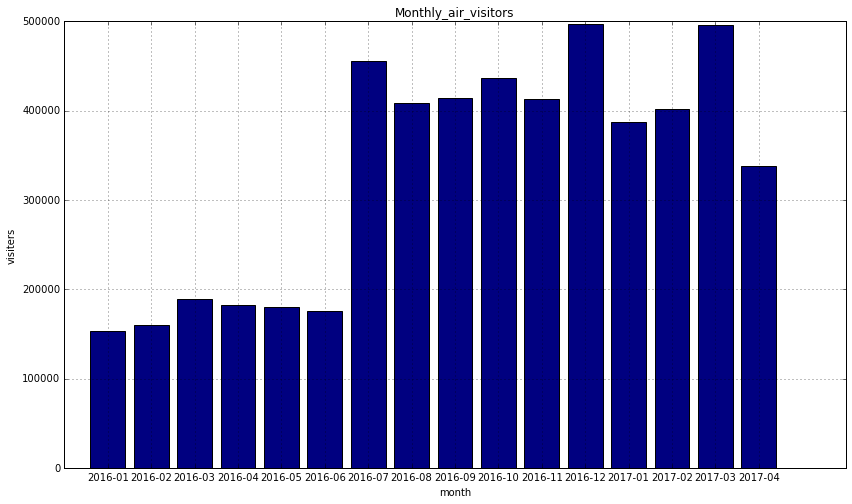

In [13]:
plt.figure(figsize=(14, 8))
plt.bar(np.arange(1,17), df3_monthly.visitors.as_matrix(), tick_label=df3_monthly.visit_month, align="center", color='navy')
plt.title("Monthly_air_visitors")
plt.xlabel("month")
plt.ylabel("visitors")
plt.grid(True)

## 予約データと訪問データを並べてみる

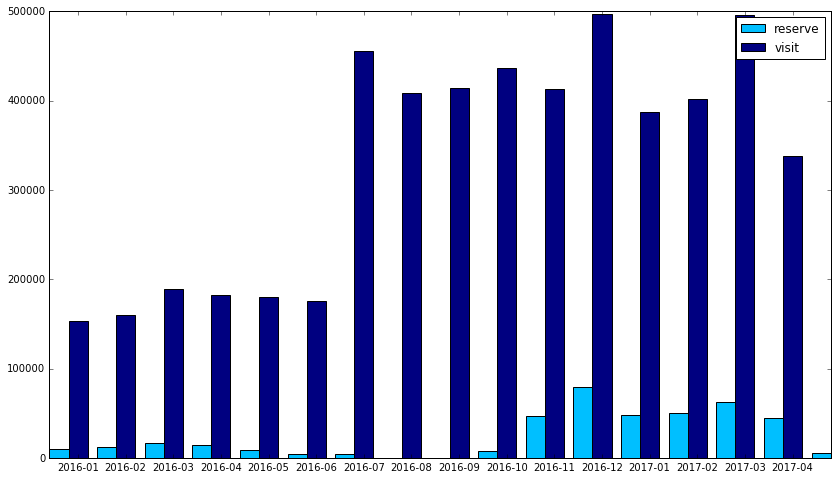

In [29]:
plt.figure(figsize=(14, 8))
height1 = df1_monthly.reserve_visitors.as_matrix()
height2 = df3_monthly.visitors.as_matrix()
w = 0.4
left1 = np.arange(len(height1))
left2 = np.arange(len(height2))

p1 = plt.bar(left1, height1, align='center', width=w, tick_label=df1_monthly.visit_month, color='deepskyblue')
p2 = plt.bar(left2 + w, height2, align='center', width=w, tick_label=df3_monthly.visit_month, color='navy')
plt.legend((p1[0], p2[0]), ("reserve", "visit"))

In [56]:
line_height = (df1_monthly.reserve_visitors / df3_monthly.visitors * 100).as_matrix()
line_height

array([  6.75825900e+00,   7.23986144e+00,   9.01834203e+00,
         7.57713746e+00,   4.66824038e+00,   2.61059481e+00,
         1.01008993e+00,   4.89835905e-04,   2.89384648e-03,
         1.80062038e+00,   1.12801640e+01,   1.58483332e+01,
         1.25343804e+01,   1.25112713e+01,   1.25371604e+01,
         1.31287030e+01,              nan])

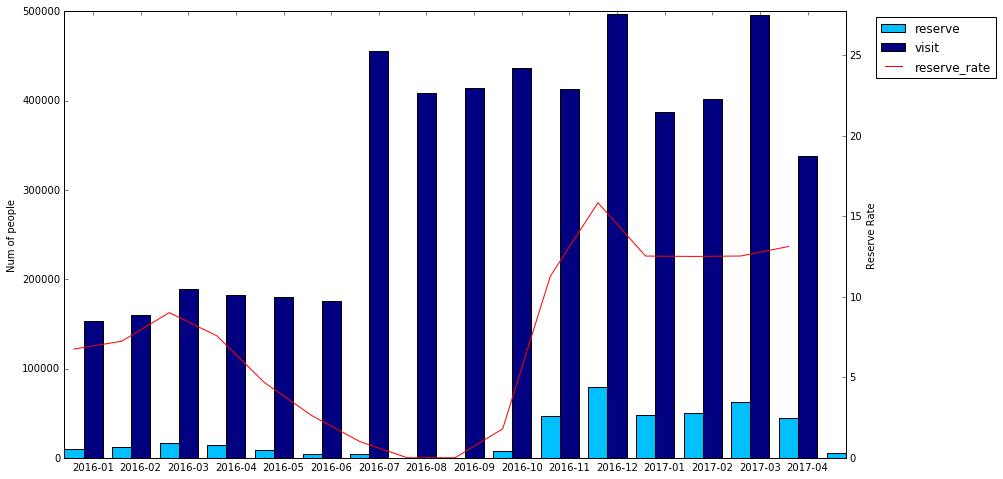

In [109]:
height1 = df1_monthly.reserve_visitors.as_matrix()
height2 = df3_monthly.visitors.as_matrix()
line_height = (df1_monthly.reserve_visitors / df3_monthly.visitors * 100).as_matrix()
w = 0.4
left1 = np.arange(len(height1))
left2 = np.arange(len(height2))

fig, ax1 = plt.subplots(figsize=(14, 8))
p1 = ax1.bar(left1, height1, align='center', width=w, tick_label=df1_monthly.visit_month, color='deepskyblue')
p2 = ax1.bar(left2 + w, height2, align='center', width=w, tick_label=df3_monthly.visit_month, color='navy')
ax1.set_ylabel('Num of people')

ax2 = ax1.twinx()
p3 = ax2.plot(left1, line_height, color="red")
ax2.set_ylabel('Reserve Rate')
ax2.set_ylim(0, np.nanmax(line_height)*1.75)

plt.legend((p1[0], p2[0], p3[0]), ("reserve", "visit", "reserve_rate"), loc='upper right', bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))

## hpg_reserve.csv [ホットペッパーグルメの予約データ]

- 2,000,320レコード
- 13,325 /4,690店舗の予約データ???
- 訪問予定は、2016-01-01 11:00:00 〜 2017-05-31 23:00:00
- 予約時刻は、2016-01-01 00:00:00 〜 2017-04-22 23:00:00

In [31]:
# .csvをDataFrame化
df4 = pd.read_csv('Data/csv/hpg_reserve.csv')
df4.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [32]:
# データ型を確認
df4.dtypes

hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [33]:
# データ型を修正
df4['visit_datetime'] = df4.visit_datetime.map(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df4['reserve_datetime'] = df4.reserve_datetime.map(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df4.dtypes

hpg_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors             int64
dtype: object

In [34]:
# 統計量を確認
df4.describe(include='all')

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
count,2000320,2000320,2000320,2.000320e+06
unique,13325,9847,11450,NaN
top,hpg_2afd5b187409eeb4,2016-12-16 19:00:00,2016-12-12 21:00:00,NaN
freq,1155,10528,907,NaN
first,NaN,2016-01-01 11:00:00,2016-01-01 00:00:00,NaN
last,NaN,2017-05-31 23:00:00,2017-04-22 23:00:00,NaN
mean,NaN,NaN,NaN,5.073785e+00
std,NaN,NaN,NaN,5.416172e+00
min,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,2.000000e+00


In [35]:
# 上記で確認できるため不要に
# df4_records = df4.hpg_store_id.count()
# df4_id = df4.hpg_store_id.value_counts().count()
# df4_min_vdate = df4.visit_datetime.min()
# df4_max_vdate = df4.visit_datetime.max()
# df4_min_rdate = df4.reserve_datetime.min()
# df4_max_rdate = df4.reserve_datetime.max()
# print(df4_records,df4_id,df4_min_vdate,df4_max_vdate,df4_min_rdate,df4_max_rdate)

In [36]:
#  予約データを月次に加工
df4_monthly = df4.copy()
df4_monthly['visit_datetime'] = df4_monthly.visit_datetime.map(lambda x: x.strftime('%Y-%m'))
drop_col = ['hpg_store_id','reserve_datetime']
df4_monthly = df4_monthly.rename(columns={'visit_datetime': 'visit_month'}).drop(drop_col,axis=1)
df4_monthly = df4_monthly.groupby(['visit_month'])['reserve_visitors'].sum().reset_index()
df4_monthly

,visit_month,reserve_visitors
0,2016-01,313180
1,2016-02,359597
2,2016-03,546433
3,2016-04,483991
4,2016-05,419393
5,2016-06,446697
6,2016-07,505157
7,2016-08,467891
8,2016-09,485723
9,2016-10,530365


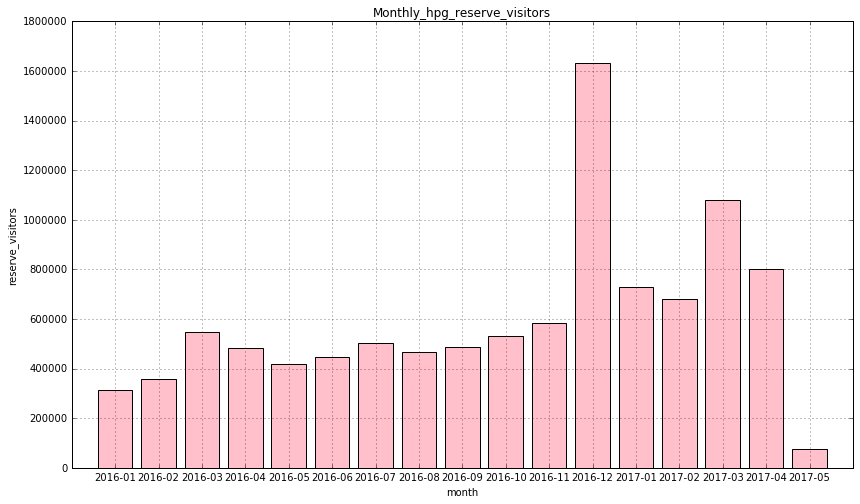

In [37]:
plt.figure(figsize=(14, 8))
plt.bar(np.arange(1,18), df4_monthly.reserve_visitors.as_matrix(), tick_label=df4_monthly.visit_month, align="center", color='pink')
plt.title("Monthly_hpg_reserve_visitors")
plt.xlabel("month")
plt.ylabel("reserve_visitors")
plt.grid(True)

## hpg_store_info.csv [ホットペッパーグルメのレストラン情報]

- 4,690の店舗データ
- 34ジャンル
- 119エリア

In [106]:
# .csvをDataFrame化
df5 = pd.read_csv('Data/csv/hpg_store_info.csv')
df5.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [107]:
# データ型を確認
df5.dtypes

hpg_store_id       object
hpg_genre_name     object
hpg_area_name      object
latitude          float64
longitude         float64
dtype: object

In [108]:
# 統計量を確認
df5.describe(include='all')

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
count,4690,4690,4690,4690.000000,4690.000000
unique,4690,34,119,NaN,NaN
top,hpg_a7c89e922518f6c8,Japanese style,Tōkyō-to Shinjuku-ku None,NaN,NaN
freq,1,1750,257,NaN,NaN
mean,NaN,NaN,NaN,35.810261,137.675816
std,NaN,NaN,NaN,2.138755,3.197233
min,NaN,NaN,NaN,33.311645,130.339313
25%,NaN,NaN,NaN,34.692109,135.498859
50%,NaN,NaN,NaN,35.659214,139.495733
75%,NaN,NaN,NaN,35.703381,139.737998


In [109]:
# 上記で確認できるため不要に
# df5_id = df5.hpg_store_id.value_counts().count()
# df5_genre = df5.hpg_genre_name.value_counts().count()
# df5_area = df5.hpg_area_name.value_counts().count()
# print(df5_id,df5_genre,df5_area)

In [110]:
# ジャンルの内訳と頻度
df5.groupby('hpg_genre_name').size().sort_values(ascending=False)

hpg_genre_name
Japanese style                  1750
International cuisine            700
Creation                         410
Seafood                          339
Grilled meat                     325
Italian                          249
Spain Bar/Italian Bar            229
Chinese general                   91
Japanese food in general          85
Japanese cuisine/Kaiseki          64
Karaoke                           60
Creative Japanese food            60
Shabu-shabu/Sukiyaki              59
Okonomiyaki/Monja/Teppanyaki      44
Party                             40
Korean cuisine                    38
French                            27
Steak/Hamburger/Curry             24
Bistro                            22
Cafe                              16
Sushi                             11
Pasta/Pizza                       10
Bar/Cocktail                       7
Western food                       5
Thai/Vietnamese food               5
Amusement bar                      5
Cantonese food         

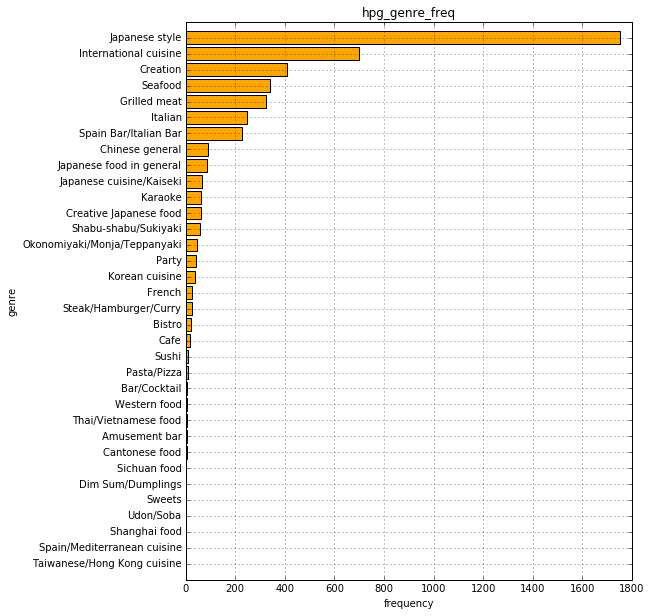

In [111]:
df5_hpg_genre_name = df5.groupby('hpg_genre_name').size().sort_values()
plt.figure(figsize=(8, 10))
plt.barh(np.arange(1,35), df5_hpg_genre_name.values, tick_label=df5_hpg_genre_name.index, align="center", color='orange')
plt.title("hpg_genre_freq")
plt.xlabel("frequency")
plt.ylabel("genre")
plt.grid(True)

In [112]:
# エリアの内訳と頻度
df5.groupby('hpg_area_name').size().sort_values(ascending=False).head(15)

hpg_area_name
Tōkyō-to Shinjuku-ku None                 257
Tōkyō-to Chūō-ku Ginza                    198
Hyōgo-ken Kōbe-shi None                   163
Ōsaka-fu Ōsaka-shi Shinsaibashisuji       150
Osaka Prefecture Osaka None               145
Hiroshima-ken Hiroshima-shi Hondōri       135
Tōkyō-to Shibuya-ku None                  127
Tōkyō-to Minato-ku Takanawa               122
Tōkyō-to Toshima-ku None                  119
None None None                            117
Tōkyō-to Hachiōji-shi Ishikawamachi       114
Hokkaidō Sapporo-shi Minami 4 Jōnishi     110
Tōkyō-to Taitō-ku None                    100
Fukuoka-ken Fukuoka-shi None               90
Shizuoka-ken Hamamatsu-shi Sukenobuchō     90
dtype: int64

In [113]:
# エリアを市区町村レベルに変更、plot時の文字化け対策で置換
df5_edit = df5.copy()
df5_edit['hpg_area_name'] = df5_edit.hpg_area_name.map(lambda x: ' '.join(x.split(' ')[:2]).translate(str.maketrans('Ōōū', 'Oou')))
df5_edit.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tokyo-to Setagaya-ku,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tokyo-to Setagaya-ku,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tokyo-to Setagaya-ku,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tokyo-to Setagaya-ku,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tokyo-to Setagaya-ku,35.643675,139.668221


In [114]:
df5_edit.hpg_area_name.describe()

count                   4690
unique                    73
top       Osaka-fu Osaka-shi
freq                     315
Name: hpg_area_name, dtype: object

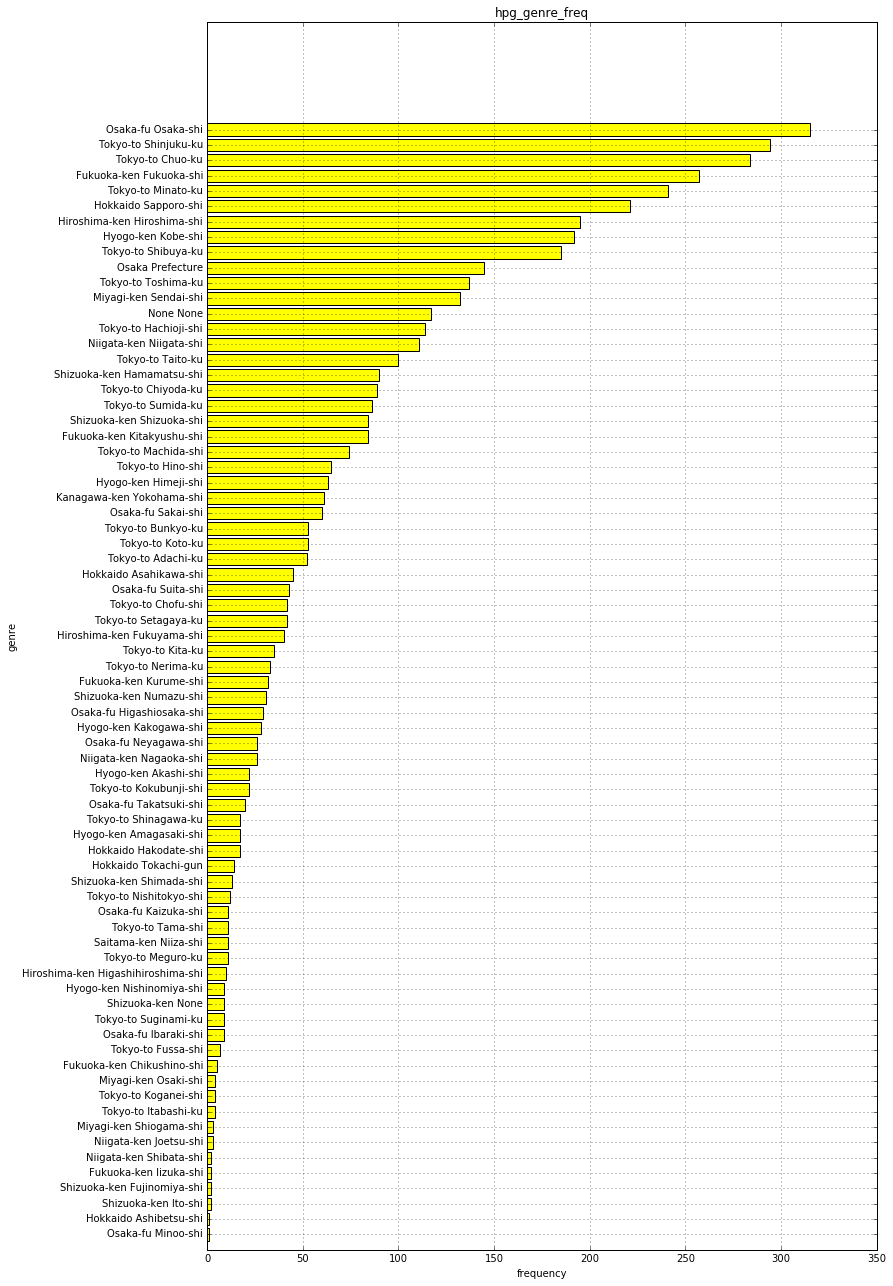

In [115]:
df5_hpg_area_name = df5_edit.groupby('hpg_area_name').size().sort_values()
plt.figure(figsize=(12, 22))
plt.barh(np.arange(1,74), df5_hpg_area_name.values, tick_label=df5_hpg_area_name.index, align="center", color='yellow')
plt.title("hpg_genre_freq")
plt.xlabel("frequency")
plt.ylabel("genre")
plt.grid(True)

## date_info.csv [カレンダー]

- 2016-01-01〜2017-05-31

In [38]:
# .csvをDataFrame化
df6 = pd.read_csv('Data/csv/date_info.csv')
df6.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [39]:
# データ型を確認
df6.dtypes

calendar_date    object
day_of_week      object
holiday_flg       int64
dtype: object

In [40]:
# データ型を修正
df6['calendar_date'] = df6.calendar_date.map(lambda x: datetime.strptime(x,'%Y-%m-%d'))
df6.dtypes

calendar_date    datetime64[ns]
day_of_week              object
holiday_flg               int64
dtype: object

In [41]:
# 統計量を確認
df6.describe(include='all')

,calendar_date,day_of_week,holiday_flg
count,517,517,517.000000
unique,517,7,NaN
top,2016-09-08 00:00:00,Wednesday,NaN
freq,1,74,NaN
first,2016-01-01 00:00:00,NaN,NaN
last,2017-05-31 00:00:00,NaN,NaN
mean,NaN,NaN,0.067698
std,NaN,NaN,0.251471
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000


In [42]:
# 上記で確認できるため不要に
# df6_min_date = df6.calendar_date.min()
# df6_max_date = df6.calendar_date.max()
# print(df6_min_date,df6_max_date)

## store_id_relation.csv [id横断データ]

- 150店舗、１対１

In [43]:
# .csvをDataFrame化
df7 = pd.read_csv('Data/csv/store_id_relation.csv')
df7.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [44]:
# データ型を確認
df7.dtypes

air_store_id    object
hpg_store_id    object
dtype: object

In [45]:
# 統計量を確認
df7.describe()

,air_store_id,hpg_store_id
count,150,150
unique,150,150
top,air_f96765e800907c77,hpg_d5ca709664abea20
freq,1,1


## sample_submission.csv [Submitサンプル]

- store_idに、アンダースコア、訪問日を付与する必要がある
- 2017-04-23〜2017-05-31が予測対象期間
- visitorsに予測値を出力する

In [46]:
# .csvをDataFrame化
sample = pd.read_csv('Data/csv/sample_submission.csv')
sample.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [47]:
# 他のデータセットと形式を合わせておく
sample_edit = sample.copy()
sample_edit['air_store_id'] = sample_edit.id.map(lambda x: '_'.join(x.split('_')[:-1]))
sample_edit['calendar_date'] = sample_edit.id.map(lambda x: x.split('_')[2])
sample_edit['calendar_date'] = sample_edit.calendar_date.map(lambda x: datetime.strptime(x,'%Y-%m-%d'))
sample_edit.drop('id',axis=1)
sample_edit = sample_edit.loc[:,['air_store_id','calendar_date','visitors']]
sample_edit.head()

,air_store_id,calendar_date,visitors
0,air_00a91d42b08b08d9,2017-04-23,0
1,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9,2017-04-25,0
3,air_00a91d42b08b08d9,2017-04-26,0
4,air_00a91d42b08b08d9,2017-04-27,0


In [48]:
sample_edit.dtypes

air_store_id             object
calendar_date    datetime64[ns]
visitors                  int64
dtype: object

### アイデアメモ
- 大口の予約レコードの取り扱い方法
- 予約に対する実訪問データの状況
- ジャンルのマッピングが必要そう
- 2016年4,5月の実績が重要
- 天候 [予測対象期間が過去のため取得可]
- 歓迎会シーズン

- オフィス数、住宅数 [都市では活きないか？]
- 人口
- 飲食店の数
- イベント[祭りなど]

# １日あたりの訪問数に対する予約率を見てみる

## Airリザーブのみ

In [49]:
#  予約データを日次に加工
air_reserve_df = pd.read_csv('Data/csv/air_reserve.csv')
air_reserve_df['visit_datetime'] = air_reserve_df['visit_datetime'].str[:10]
air_reserve_df = air_reserve_df.rename(columns={'visit_datetime': 'visit_date'}).drop('reserve_datetime',axis=1)
air_reserve_df = air_reserve_df.groupby(['air_store_id','visit_date'])['reserve_visitors'].sum().reset_index()
air_reserve_df.head()

,air_store_id,visit_date,reserve_visitors
0,air_00a91d42b08b08d9,2016-10-31,2
1,air_00a91d42b08b08d9,2016-12-05,9
2,air_00a91d42b08b08d9,2016-12-14,18
3,air_00a91d42b08b08d9,2016-12-17,2
4,air_00a91d42b08b08d9,2016-12-20,4


In [50]:
#  訪問データを読み込み
air_visit_df = pd.read_csv('Data/csv/air_visit_data.csv')
air_visit_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [51]:
# 訪問データに予約データを結合
air_df = pd.merge(air_visit_df,air_reserve_df,on=['air_store_id','visit_date'],how='left')
air_df.head()

,air_store_id,visit_date,visitors,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,NaN


In [52]:
air_df.columns

Index(['air_store_id', 'visit_date', 'visitors', 'reserve_visitors'], dtype='object')

In [53]:
# reserve_rate を追加して予約率を算出
air_df = DataFrame(air_df, columns=['air_store_id','visit_date','visitors','reserve_visitors','reserve_rate'])
air_df['reserve_rate'] = air_df['reserve_visitors'] / air_df['visitors'] * 100
air_df[air_df['reserve_rate'] > 0].head(15)

,air_store_id,visit_date,visitors,reserve_visitors,reserve_rate
1006,air_35512c42db0868da,2016-02-27,6,12.0,200.000000
3744,air_ee3a01f0c71a769f,2016-01-04,61,2.0,3.278689
3747,air_ee3a01f0c71a769f,2016-01-08,21,3.0,14.285714
3748,air_ee3a01f0c71a769f,2016-01-09,57,25.0,43.859649
3749,air_ee3a01f0c71a769f,2016-01-10,32,5.0,15.625000
3750,air_ee3a01f0c71a769f,2016-01-11,35,6.0,17.142857
3754,air_ee3a01f0c71a769f,2016-01-16,34,6.0,17.647059
3755,air_ee3a01f0c71a769f,2016-01-17,58,12.0,20.689655
3756,air_ee3a01f0c71a769f,2016-01-18,14,2.0,14.285714
3758,air_ee3a01f0c71a769f,2016-01-22,6,1.0,16.666667


このデータからキャンセル数は把握できないため、注意が必要

## Airリザーブ ＋ ホットペッパーグルメ

In [54]:
#  予約データを日次に加工
hpg_reserve_df = pd.read_csv('Data/csv/hpg_reserve.csv')
hpg_reserve_df['visit_datetime'] = hpg_reserve_df['visit_datetime'].str[:10]
hpg_reserve_df = hpg_reserve_df.rename(columns={'visit_datetime': 'visit_date'}).drop('reserve_datetime',axis=1)
hpg_reserve_df = hpg_reserve_df.groupby(['hpg_store_id','visit_date'])['reserve_visitors'].sum().reset_index()
hpg_reserve_df.head()

,hpg_store_id,visit_date,reserve_visitors
0,hpg_001112ef76b9802c,2016-02-26,9
1,hpg_001112ef76b9802c,2016-03-17,3
2,hpg_001112ef76b9802c,2016-03-31,5
3,hpg_001112ef76b9802c,2016-04-05,13
4,hpg_001112ef76b9802c,2016-04-18,9


In [4]:
#  id横断データを読み込み
store_id_df = pd.read_csv('Data/csv/store_id_relation.csv')

In [56]:
# ホットペッパーグルメのstore_idに、Airリザーブのstore_idを結合
hpg_reserve_df = pd.merge(hpg_reserve_df,store_id_df,on=['hpg_store_id'],how='inner')
hpg_reserve_df.head()

,hpg_store_id,visit_date,reserve_visitors,air_store_id
0,hpg_0183ec352e38903c,2016-01-09,2,air_cbe867adcf44e14f
1,hpg_0183ec352e38903c,2016-01-11,8,air_cbe867adcf44e14f
2,hpg_0183ec352e38903c,2016-01-14,11,air_cbe867adcf44e14f
3,hpg_0183ec352e38903c,2016-01-15,8,air_cbe867adcf44e14f
4,hpg_0183ec352e38903c,2016-01-18,9,air_cbe867adcf44e14f


In [57]:
# 作成したAirリザーブの予約・訪問データに、ホットペッパーグルメの予約データを結合
air_hpg_df = pd.merge(air_df,hpg_reserve_df,on=['air_store_id','visit_date'],how='left')
air_hpg_df.head()

,air_store_id,visit_date,visitors,reserve_visitors_x,reserve_rate,hpg_store_id,reserve_visitors_y
0,air_ba937bf13d40fb24,2016-01-13,25,NaN,NaN,NaN,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,NaN,NaN,NaN,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,NaN,NaN,NaN,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,NaN,NaN,NaN,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,NaN,NaN,NaN,NaN


In [58]:
# Airリザーブとホットペッパーグルメの予約データを合算して、予約率を算出
air_hpg_df = DataFrame(air_hpg_df, columns=['air_store_id','hpg_store_id','visit_date','visitors','reserve_visitors','reserve_visitors_x','reserve_visitors_y','reserve_rate'])
air_hpg_df['reserve_visitors'] = air_hpg_df['reserve_visitors_x'] + air_hpg_df['reserve_visitors_y']
air_hpg_df['reserve_rate'] = air_hpg_df['reserve_visitors'] / air_hpg_df['visitors'] * 100
air_hpg_df = air_hpg_df.rename(columns={'reserve_visitors_x': 'reserve_visitors_air', 'reserve_visitors_y': 'reserve_visitors_hpg'})
air_hpg_df[air_hpg_df['reserve_rate'] > 0].head(15)

,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,reserve_visitors_air,reserve_visitors_hpg,reserve_rate
4669,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-10-27,48,14.0,12.0,2.0,29.166667
4670,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-10-28,25,6.0,4.0,2.0,24.000000
4671,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-10-29,42,45.0,17.0,28.0,107.142857
4673,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-01,76,77.0,74.0,3.0,101.315789
4676,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-04,5,18.0,11.0,7.0,360.000000
4677,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-05,51,38.0,26.0,12.0,74.509804
4678,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-07,9,4.0,2.0,2.0,44.444444
4688,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-19,66,22.0,13.0,9.0,33.333333
4690,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-22,7,17.0,13.0,4.0,242.857143
4691,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-23,36,17.0,15.0,2.0,47.222222


## Airリザーブのレストラン情報を結合

In [3]:
#  Airリザーブのレストラン情報を読み込み
air_store_df = pd.read_csv('Data/csv/air_store_info.csv')
air_store_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [60]:
airi_hpg_df = pd.merge(air_hpg_df,air_store_df,on=['air_store_id'],how='left')
airi_hpg_df = airi_hpg_df.rename(columns={'latitude': 'latitude_air', 'longitude': 'longitude_air'})
airi_hpg_df[airi_hpg_df['reserve_rate'] > 0].head(15)

,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,reserve_visitors_air,reserve_visitors_hpg,reserve_rate,air_genre_name,air_area_name,latitude_air,longitude_air
4669,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-10-27,48,14.0,12.0,2.0,29.166667,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4670,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-10-28,25,6.0,4.0,2.0,24.000000,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4671,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-10-29,42,45.0,17.0,28.0,107.142857,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4673,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-01,76,77.0,74.0,3.0,101.315789,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4676,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-04,5,18.0,11.0,7.0,360.000000,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4677,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-05,51,38.0,26.0,12.0,74.509804,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4678,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-07,9,4.0,2.0,2.0,44.444444,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4688,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-19,66,22.0,13.0,9.0,33.333333,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4690,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-22,7,17.0,13.0,4.0,242.857143,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018
4691,air_3e93f3c81008696d,hpg_c2a8494d55fafbd6,2016-11-23,36,17.0,15.0,2.0,47.222222,Okonomiyaki/Monja/Teppanyaki,Hiroshima-ken Hiroshima-shi Kokutaijimachi,34.386245,132.455018


## ホットペッパーグルメのレストラン情報を結合

In [5]:
#  ホットペッパーグルメのレストラン情報を読み込み
hpg_store_df = pd.read_csv('Data/csv/hpg_store_info.csv')
hpg_store_df.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [62]:
airi_hpgi_df = pd.merge(airi_hpg_df,hpg_store_df,on=['hpg_store_id'],how='left')
airi_hpgi_df = airi_hpgi_df.rename(columns={'latitude': 'latitude_hpg', 'longitude': 'longitude_hpg'})
airi_hpgi_df[airi_hpgi_df['latitude_air'] > 0][airi_hpgi_df['latitude_hpg'] > 0].head(15)

,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,reserve_visitors_air,reserve_visitors_hpg,reserve_rate,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg
8330,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-01-03,132,NaN,NaN,4.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8333,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-01-09,45,NaN,NaN,25.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8334,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-01-10,2,NaN,NaN,6.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8336,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-01-15,5,NaN,NaN,3.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8342,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-01-24,4,NaN,NaN,2.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8344,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-01-30,40,NaN,NaN,2.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8347,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-02-02,3,NaN,NaN,3.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8348,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-02-06,48,NaN,NaN,9.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8349,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-02-08,6,9.0,2.0,7.0,150.0,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664
8351,air_37189c92b6c761ec,hpg_2e10e1956528199a,2016-02-12,45,NaN,NaN,4.0,NaN,Bar/Cocktail,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,International cuisine,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664


In [63]:
#  カレンダーを読み込み
calendar_df = pd.read_csv('Data/csv/date_info.csv')
calendar_df.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [64]:
calendar_df = calendar_df.rename(columns={'calendar_date': 'visit_date'})
comp_df = pd.merge(airi_hpgi_df,calendar_df,on=['visit_date'],how='left')
comp_df.head()

,air_store_id,hpg_store_id,visit_date,visitors,reserve_visitors,reserve_visitors_air,reserve_visitors_hpg,reserve_rate,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,NaN,2016-01-13,25,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,Wednesday,0
1,air_ba937bf13d40fb24,NaN,2016-01-14,32,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,Thursday,0
2,air_ba937bf13d40fb24,NaN,2016-01-15,29,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,Friday,0
3,air_ba937bf13d40fb24,NaN,2016-01-16,22,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,Saturday,0
4,air_ba937bf13d40fb24,NaN,2016-01-18,6,NaN,NaN,NaN,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,Monday,0


## 予約訪問者数の積み上げ

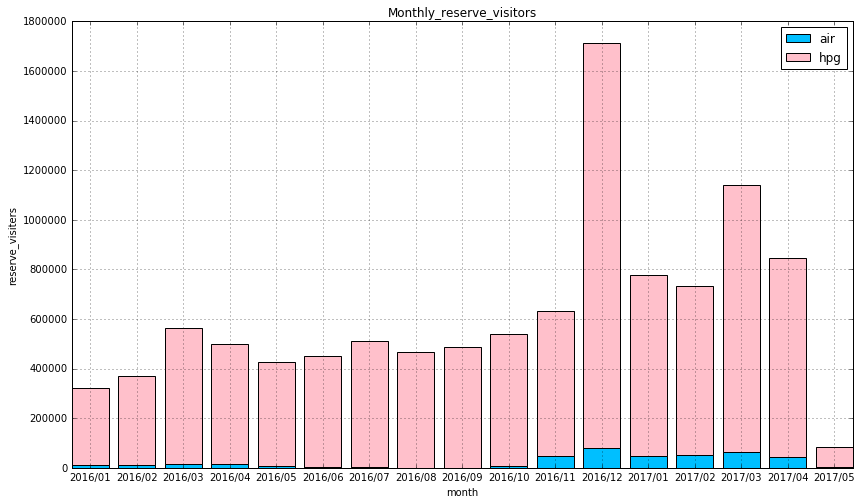

In [93]:
plt.figure(figsize=(14, 8))
left = np.arange(1,18)
height1 = df1_monthly.reserve_visitors.as_matrix()
height2 = df4_monthly.reserve_visitors.as_matrix()
p1 = plt.bar(left, height1, tick_label=df1_monthly.visit_month, align="center", color='deepskyblue')
p2 = plt.bar(left, height2, align="center", bottom=height1, color='pink')
plt.title("Monthly_reserve_visitors")
plt.xlabel("month")
plt.ylabel("reserve_visitors")
plt.grid(True)
plt.legend((p1[0], p2[0]), ("air", "hpg"))

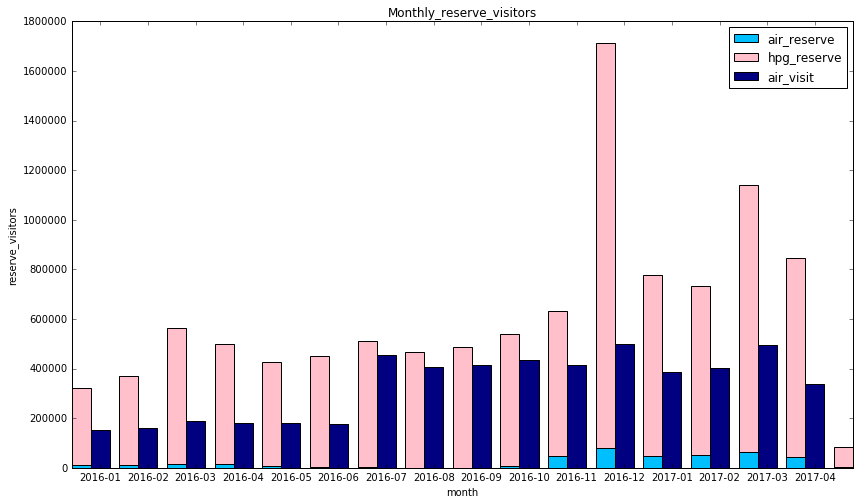

In [53]:
plt.figure(figsize=(14, 8))
height1 = df1_monthly.reserve_visitors.as_matrix()
height2 = df4_monthly.reserve_visitors.as_matrix()
height3 = df3_monthly.visitors.as_matrix()
left1 = np.arange(len(height1))
left3 = np.arange(len(height3))
w = 0.4
p1 = plt.bar(left1, height1, tick_label=df1_monthly.visit_month, align="center", width=w, color='deepskyblue')
p2 = plt.bar(left1, height2, align="center", width=w, bottom=height1, color='pink')
p3 = plt.bar(left2 + w, height3, align='center', width=w, tick_label=df3_monthly.visit_month, color='navy')
plt.title("Monthly_reserve_visitors")
plt.xlabel("month")
plt.ylabel("reserve_visitors")
plt.legend((p1[0], p2[0], p3[0]), ("air_reserve", "hpg_reserve", "air_visit"))

# 店舗情報のマッピング検討

In [6]:
store_map_df = pd.merge(air_store_df,store_id_df,on=['air_store_id'],how='inner')
store_map_df = pd.merge(store_map_df,hpg_store_df,on=['hpg_store_id'],how='left')
store_map_df = DataFrame(store_map_df, columns=['air_genre_name','hpg_genre_name'])
store_map_df = store_map_df.drop_duplicates(['air_genre_name','hpg_genre_name'])
store_map_df

,air_genre_name,hpg_genre_name
0,Italian/French,NaN
2,Italian/French,Spain Bar/Italian Bar
3,Italian/French,Italian
20,Dining bar,NaN
24,Dining bar,Seafood
27,Dining bar,Italian
28,Dining bar,International cuisine
29,Dining bar,Creation
30,Dining bar,Spain Bar/Italian Bar
45,Yakiniku/Korean food,Grilled meat
